# Title

First thing, let's import some libraries:


In [1]:
from MCL.World import World
from MCL.Robot import Robot
import numpy as np
import matplotlib.pyplot as plt

*Note: I treated the classes we got as open-source so I feel free to make some changes
in them.*

## Plotting Robots

In order to get more familiar with the `Robot` and `World` classes we were asked to
plot some robots in a world:


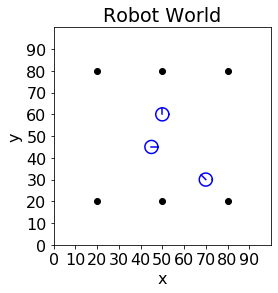

In [3]:
# Create the world & robots
poses = [(45, 45, 0), (50, 60, np.pi / 2), (70, 30, 3 * np.pi / 4)]
robots = [Robot(init_pose=p) for p in poses]
world = World()

# Plot world & robots
world.plot(show=False)
list(map(lambda x: x.plot(show=False), robots))
plt.show()

## Adding `move` method

In order to implement a `move` method as required I used the given model
motion equations with some noise. First I implemented 3 function for the motion model
The functions `x_motion`, `y_motion` and `theta_motion` getting the relevant input and
return new x, y, and theta position respectively. Then I added to the `Robot` class 3
properties for the motion of x, y and theta. The `__init__` function assign to these
properties the above-mentioned functions. Now, for moving any robot all we need to do
is to use these functions and then set the new position of the robot using the wonderful
giving Robot's method `set`.

## Adding `sense` method

Next we implemented a `sense` method which get list of landmarks, where
each landmark is a tuple of x and y position and return list of measurements.
Each measurement $i$ from the measurements list is also a tuple of
distance and bearing from the $i$ landmark. The follows equation
been used to compute the range and bearing:

$$range_i = \sqrt{(m_{i, x} - x)^2 + (m_{i, y} - y)^2} + \delta_{range}$$ <br>
$$bearing_i = \operatorname{atan2}(m_{i, y} - y, m_{i, x} - x) - \theta + \delta_{bearing}$$

where,

$$\delta_{range} \sim \mathcal{N}(0, \sigma_{range}), \quad \delta_{bearing} \sim \mathcal{N}(0, \sigma_{bearing})$$

and $i$ denote the $i$ landmark.

## Adding `measurement_probability` method

The `measurement_probability()` method getting the following arguments:

1. `pose` - the position we want to compute the probability for it,
in the form of $(x, y, \theta)$. Usually known as $x_t$.

1. `measurement` - the measurement we got when we used the `sense()` method,
in the form of $(r, \phi)$. Usually known as $z_t$.

1. `landmark` - the position of the landmark we measured $(r, \phi)$ to it,
in the form of $(m_x,m_y)$. Usually known as $m$

The method compute the follows expression:

$$p(z_t | x_t, m) = prob(r - \hat{r}, \sigma_r) * prob(\phi - \hat{\phi}, \sigma_{\phi})$$

where:

$$\hat{r} = \sqrt{(m_x - x)^2 - (m_y - y)^2}, \quad \hat{\phi} = atan2(m_y - y, m_x - x) - \theta$$